# Task 3: Cat vs Dog Image Classification using Support Vector Machine (SVM)

   Feature1  Feature2 Label
0  0.496714 -1.415371   Dog
1 -0.138264 -0.420645   Dog
2  0.647689 -0.342715   Cat
3  1.523030 -0.802277   Dog
4 -0.234153 -0.161286   Cat
Accuracy: 0.45


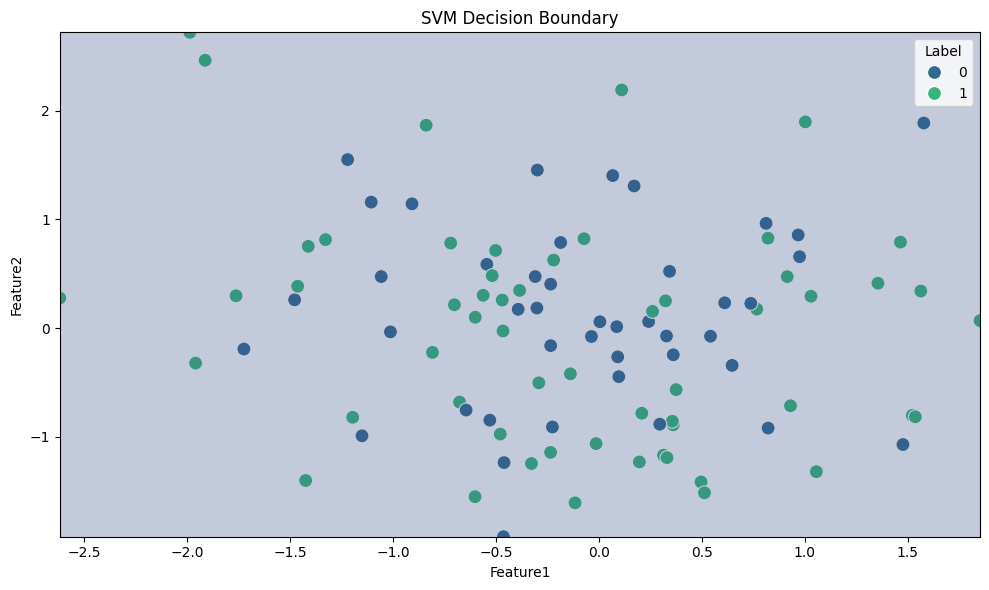

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a synthetic dataset
np.random.seed(42)
data = {
    'Feature1': np.random.randn(100),
    'Feature2': np.random.randn(100),
    'Label': np.random.choice(['Cat', 'Dog'], 100)
}

df = pd.DataFrame(data)
print(df.head())

# Preprocess the dataset
df['Label'] = df['Label'].map({'Cat': 0, 'Dog': 1})

# Define features and target
X = df[['Feature1', 'Feature2']]
y = df['Label']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM model
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Visualize decision boundary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Feature1', y='Feature2', hue='Label', data=df, palette='viridis', s=100)

# Mesh grid for plotting decision boundary
xx, yy = np.meshgrid(
    np.linspace(X['Feature1'].min(), X['Feature1'].max(), 100),
    np.linspace(X['Feature2'].min(), X['Feature2'].max(), 100)
)

# Create DataFrame with correct feature names
grid = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=['Feature1', 'Feature2'])

# Predict and reshape for contour
Z = model.predict(grid)
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
plt.title('SVM Decision Boundary')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.tight_layout()
plt.show()
